# LIBS spectral analysis

Before we start we create some functions to read data from a spectral data file.

In [13]:
from scipy import *
from pylab import *
import scipy.stats as st

def read_data(filename):
    
    """For a given spectral datafile it returns 4 arrays:
    Wavenumber(nm)
    Sample(counts)
    Dark(counts)
    Reference(counts)
    """
    
    fl=open(filename,'r')
    wave=[]
    sample=[]
    dark=[]
    reference=[]
    
    #skips header
    for i in range(0,8):
        fl.readline()
    
    line=fl.readline()
    #for all lines now
    while len(line)>1:
        #print "nl" + line
        line=line.replace(",",".")
        data=line.split(";")
        wave.append(float(data[0]))
        sample.append(float(data[1]))
        dark.append(float(data[2]))
        reference.append(float(data[3]))
        line=fl.readline()
        
    return array(wave),array(sample),array(dark),array(reference)


def find_wavenumber_index(wavenumber,list_wn):
    """
    Find the index corresponding to the wavenumber closer to the given one
    """
    for i in range(0,len(list_wn)):
        if wavenumber >= list_wn[i] and wavenumber < list_wn[i+1]:
            return i
        

# Plot example

Text(0,0.5,'Intensity (Counts)')

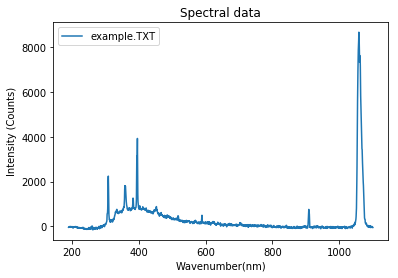

In [14]:
file_name="example.TXT"
wave,sample,dark,reference=read_data(file_name)
figure(1)
title("Spectral data")
plot(wave,sample,ls='-',label=file_name)
legend()
xlabel("Wavenumber(nm)")
ylabel("Intensity (Counts)")

# Analysis considering the integral of a given interval

## Choose the data folder, material and spectral lines

./2020-11-27/Target Cu 99,999% LOT001953/1000 ms/1703254U1_0001_1703254U1.TXT


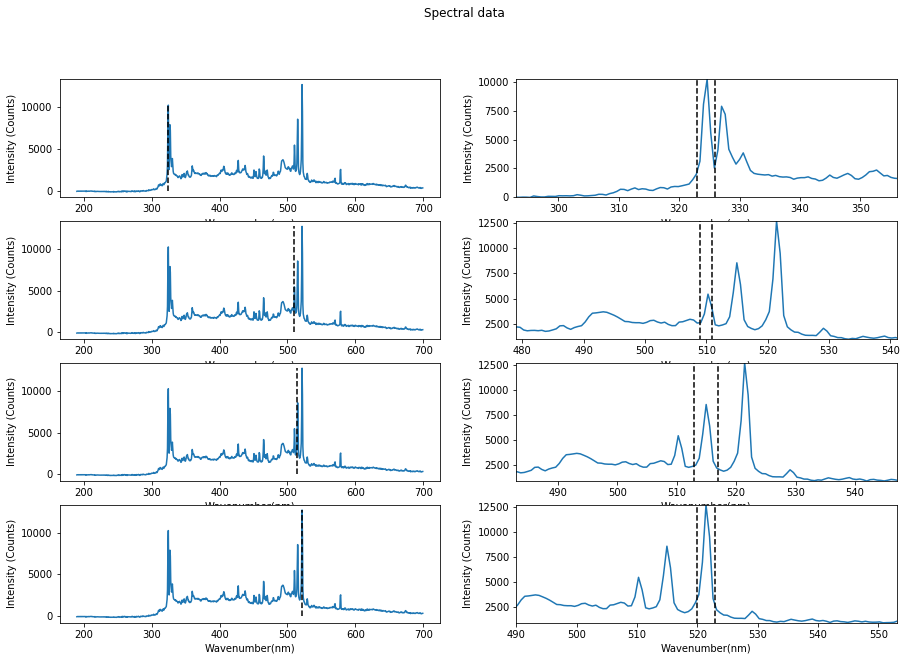

In [17]:
import os

#where is the data

folder_main = "./2020-11-27/"

#choose material
material = "Cu"

if material == "Al":
    folder_name = folder_main + "Target Al 99,999% LOT003383/"
    
    #spectral lines to consider
    lines = [309, 394, 396, 466]
    #upper and lower limits for integration
    up_ls = [310, 395, 398, 467]
    lw_ls = [309, 394, 397, 466]
    #up_ls = [311, 395, 398, 469]
    #lw_ls = [307, 393, 393, 464]
    
    
if material == "Cu":
    folder_name = folder_main + "Target Cu 99,999% LOT001953/"
    
    lines = [324, 510, 514, 521]
    up_ls = [326, 511, 517, 523]
    lw_ls = [323, 509, 513, 520]
    
    
if material == "Fe":
    folder_name = folder_main + "Target Fe 99,95% LOT005133/"
    
    lines = [358, 373, 381, 492] 
    up_ls = [359, 378, 385, 493]
    lw_ls = [356, 371, 380, 491]
    



#get all the folder names inside the folder_name
list_folders=[]

all_subdirs = [d for d in os.listdir(folder_name) if os.path.isdir(folder_name+d)] 

for dirs in all_subdirs:
    try:
        list_folders.append([dirs,int(dirs.split(" ")[0]),[f for f in os.listdir(folder_name+dirs) if f.endswith(".TXT")]])
    except:
        list_folders.append([dirs,dirs.split(" ")[0],[f for f in os.listdir(folder_name+dirs) if f.endswith(".TXT")]])
        

file_name=folder_name+list_folders[0][0]+"/"+list_folders[0][2][0]
print(file_name)
wave,sample,dark,reference=read_data(file_name)

lines_indexes=[]
for i in range(0,len(lines)):
    wavenumber_line= lines[i]
    wavenumber_min = lw_ls[i]
    wavenumber_max = up_ls[i]
    index_0 = find_wavenumber_index(wavenumber_line,wave)
    index_min = find_wavenumber_index(wavenumber_min, wave)
    index_max = find_wavenumber_index(wavenumber_max, wave)
    lines_indexes.append([[wavenumber_line,index_0],[wavenumber_min, index_min],[wavenumber_max, index_max]])
    

figure(1,[15,10])
suptitle("Spectral data")

for i in range(0, len(lines)):
    
    index_min=lines_indexes[i][1][1]
    index_max=lines_indexes[i][2][1]
    wavenumber=lines_indexes[i][0][0]
    wavenumber_min=lines_indexes[i][1][0]
    wavenumber_max=lines_indexes[i][2][0]
    
    plot_n_1 = str(len(lines))+str(2)+str(2*i+1)
    plot_n_2 = str(len(lines))+str(2)+str(2*i+2)
    
    subplot(plot_n_1)
    
    i_t=find_wavenumber_index(700, wave)
    plot(wave[:i_t],sample[:i_t],ls='-',label=file_name)
    xlabel("Wavenumber(nm)")
    ylabel("Intensity (Counts)")
    
    max_intensity=max(sample[index_min-50:index_max+50])
    min_intensity=min(sample[index_min-50:index_max+50])
    
    plot([wavenumber,wavenumber],[0,max_intensity],'--',color='k')

    subplot(plot_n_2)
    plot(wave,sample,ls='-',label=file_name)
    xlabel("Wavenumber(nm)")
    ylabel("Intensity (Counts)")
    xlim([wavenumber_min-30,wavenumber_max+30])
    max_intensity=max(sample[index_min-50:index_max+50])
    min_intensity=min(sample[index_min-50:index_max+50])
    ylim([min_intensity,max_intensity])
    plot([wavenumber_max,wavenumber_max],[0,max_intensity],'--',color='k')
    plot([wavenumber_min,wavenumber_min],[0,max_intensity],'--',color='k')

## Analysis with time

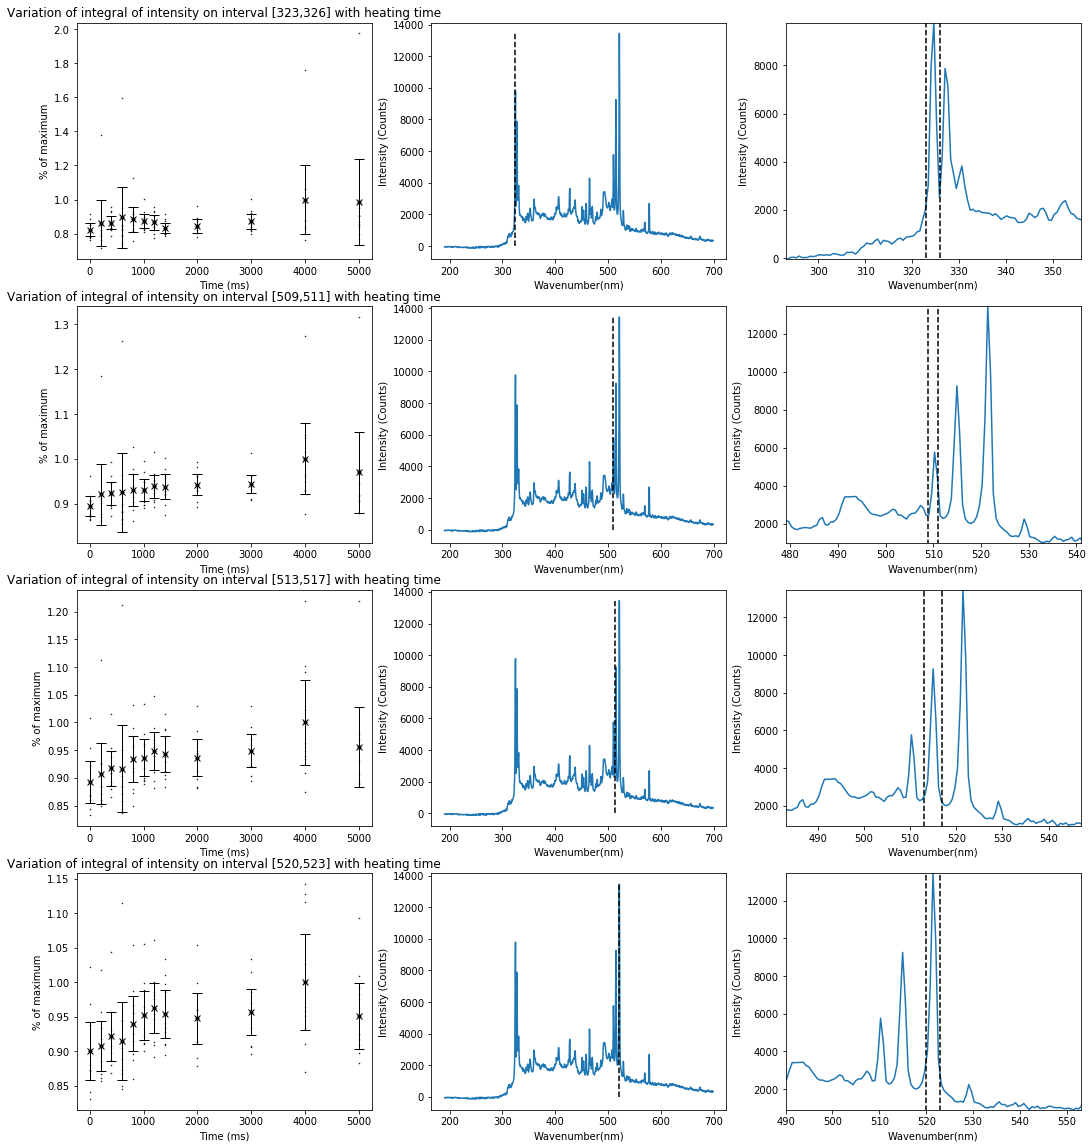

In [18]:
list_files=[]

#
wave,sample,dark,reference=read_data(folder_name+list_folders[0][0]+"/"+list_folders[0][2][0])

fig=figure(2,[18,20])
#cycle over all lines
for l in range(0, len(lines)):
    
    index_min=lines_indexes[l][1][1]
    index_max=lines_indexes[l][2][1]
    wavenumber=lines_indexes[l][0][0]
    wavenumber_min=lines_indexes[l][1][0]
    wavenumber_max=lines_indexes[l][2][0]
            
    plot_number1=str(len(lines))+","+str(3)+","+str(3*l+1)
    plot_number2=str(len(lines))+","+str(3)+","+str(3*l+2)
    plot_number3=str(len(lines))+","+str(3)+","+str(3*l+3)

    max_intensity=0
    times=[]

    total_areas=[] #auxiliary to compute percentual difference
    areas=[]
    areas_mean=[]
    areas_error_bars=[]

    #cycle over all times
    for j in range(0,len(list_folders)):




        #if it is time - i.e. not background
        if type(list_folders[j][1])==int:

            times.append(list_folders[j][1])

            area=[]
            for i in range(0,len(list_folders[j][2])):

                wave,sample,dark,reference=read_data(folder_name+list_folders[j][0]+"/"+list_folders[j][2][i])
                area.append(sum(sample[index_min:index_max]))
                total_areas.append(sum(sample[index_min:index_max]))

            areas.append(array(area))


    for i in range(0, len(times)):
        areas_mean.append(mean(array(areas)[i]))

    max_intensity = max(areas_mean)
    max_percent=array(areas)/max_intensity
    times=array(times)

    areas_mean=[]

    for i in range(0, len(times)):
        areas_mean.append(mean(max_percent[i]))
        areas_error_bars.append(abs(array(st.t.interval(0.95, len(max_percent[i])-1, loc=np.mean(max_percent[i]), 
                                              scale=st.sem(max_percent[i])))-mean(max_percent[i])))
    
    areas_error_bars=transpose(array(areas_error_bars))
    
    fig.add_subplot(len(lines), 3, 3*l+1)
    title("Variation of integral of intensity on interval ["+str(wavenumber_min)+","+str(wavenumber_max)+ "] with heating time")
    plot(array(times), max_percent,'.',color='k',markersize=1)
    plot(times,areas_mean,'x',color='k')
    errorbar(times, areas_mean,yerr=array(areas_error_bars),fmt='.k',elinewidth=1,capsize=5)

    xlabel("Time (ms)")
    ylabel("% of maximum")

    fig.add_subplot(len(lines), 3, 3*l+2)
    plot(wave[:find_wavenumber_index(700, wave)],sample[:find_wavenumber_index(700, wave)],ls='-',label=file_name)
    xlabel("Wavenumber(nm)")
    ylabel("Intensity (Counts)")
    plot([wavenumber,wavenumber],[0,max(sample[:find_wavenumber_index(700, wave)])],'--',color='k')
    
    fig.add_subplot(len(lines), 3, 3*l+3)
    plot(wave,sample,ls='-',label=file_name)
    xlabel("Wavenumber(nm)")
    ylabel("Intensity (Counts)")
    xlim([wavenumber_min-30,wavenumber_max+30])
    max_intensity=max(sample[index_min-50:index_max+50])
    min_intensity=min(sample[index_min-50:index_max+50])
    ylim([min_intensity,max_intensity])
    plot([wavenumber_max,wavenumber_max],[0,max_intensity],'--',color='k')
    plot([wavenumber_min,wavenumber_min],[0,max_intensity],'--',color='k')


savefig(material+"_time_analysis.png")


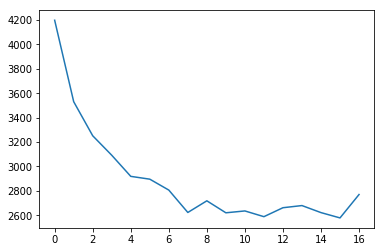

In [11]:
plot(sample[index_min:index_max])